<a href="https://colab.research.google.com/github/NithinGamer/Code_bros/blob/main/BoschHackathonModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [2]:
pip install -q tflite-model-maker

     |████████████████████████████████| 593kB 5.2MB/s 
     |████████████████████████████████| 6.3MB 33.3MB/s 
     |████████████████████████████████| 686kB 31.3MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 112kB 41.7MB/s 
     |████████████████████████████████| 215kB 31.1MB/s 
     |████████████████████████████████| 645kB 38.5MB/s 
     |████████████████████████████████| 1.2MB 39.6MB/s 
     |████████████████████████████████| 122kB 42.0MB/s 
     |████████████████████████████████| 92kB 9.7MB/s 
     |████████████████████████████████| 849kB 41.4MB/s 
     |████████████████████████████████| 1.1MB 47.8MB/s 
     |████████████████████████████████| 358kB 40.1MB/s 
     |████████████████████████████████| 38.2MB 74kB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
     |████████████████████████████████| 194kB 51.6MB/s 


In [3]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [5]:
image_path = '/content/sample_data/Boschackathon'
image_path = os.path.join(os.path.dirname(image_path), 'Boschackathon')

In [6]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 137, num_label: 5, labels: .ipynb_checkpoints, Cables and Wires, Door, Furniture, Garments.


In [7]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

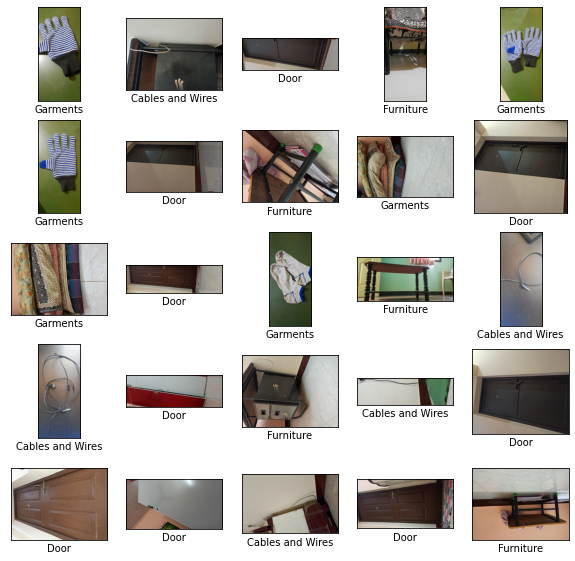

In [8]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [9]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
3/3 [==============================] - 8s 2s/step - loss: 1.8045 - accuracy: 0.1979
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 1.3991 - accuracy: 0.4271
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.0367 - accuracy: 0.6875
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 0.8388 - accuracy: 0.7708
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 0.6475 - accuracy: 0.9062


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


In [11]:
loss, accuracy = model.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.7144 - accuracy: 0.8571


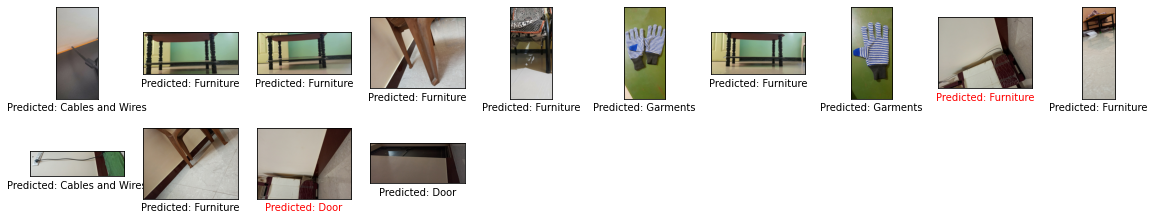

In [12]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [13]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpeemrrqtn/assets


INFO:tensorflow:Assets written to: /tmp/tmpeemrrqtn/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp19zh4gul/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp19zh4gul/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite
